
<img src="https://i.ibb.co/1T5Wbn6/Banner-para-Linkedin-capa-de-perfil-para-programador.png"  alt="KCode Banner"  />

<a href="https://www.linkedin.com/in/kauebr/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width="30" ></a> <a href="mailto: kauemandarino@gmail.com"><img src="https://cdn-icons-png.flaticon.com/512/5968/5968534.png" width="30" ></a><a href="
https://api.whatsapp.com/send?phone=5541987947490&text=Oi"> <img src="https://imagepng.org/wp-content/uploads/2017/08/whatsapp-icone-1.png" width="30" ></a><a href="https://github.com/kauebr/"><img src="https://github.githubassets.com/images/modules/logos_page/Octocat.png" width="30" ></a>


# Estatística Bivariada
## Variável qualitativa x variável quantitativa

## Objetivo:

* Hoje faremos uma análise de relação entre uma variável qualitativa e uma quantitativa

### Metodologia/Passos

* Gerar um dataset ficticio com os dados, o dataset terá uma amostra maior feminina do que a amostra masculina, e o tamanho dos homens será ligeiramente maior que o das mulheres;
* Plotar 4 gráficos adequados à esta análise sendo eles, histograma, densidade boxplot e violino;
* Escrever uma breve análise sobre o conjunto, que deve bater, logicamente com o passo 1;

In [23]:
# Importantdo bibliotecas pertinentes
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Gerando um conjunto de dados aleatório, mas com características semelhantes às encontradas na realidade:
O código abaixo tem como objetivo gerar um conjunto de dados fictício que contenha informações sobre o sexo e o tamanho de um grupo de pessoas. A amostra terá uma quantidade maior de mulheres do que de homens, e o tamanho dos homens será ligeiramente maior do que o das mulheres.
Para isso, utilizarei a biblioteca random do Python para gerar valores aleatórios de altura com médias e desvios-padrão diferentes para cada grupo (homens e mulheres).

In [15]:
n_fem = int(round((333 * 0.489), 0))
n_masc = int(round((333 * 0.511),0))

163


In [55]:
# Definindo a quantidade de homens e mulheres
# Com base em uma total de 333 pessoas utilizei a proporção real de homens x mulheres no Brasil, segundo o site do IBGE
n_fem = int(round((333 * 0.489), 0))
n_masc = int(round((333 * 0.511),0))

# Definindo as médias e desvios-padrão de cada grupo;
# Utilizei as médias reais do homem e da mulher brasileira, encontrados em rápida pesquisa na internet. https://shre.ink/Q016
mu_fem = 1.62  # Média de altura das mulheres em metros
mu_masc = 1.75  # Média de altura dos homens em metros


sigma_fem = 0.1 # Desvio-padrão de altura das mulheres em metros
sigma_masc = 0.12  # Desvio-padrão de altura dos homens em metros

# Gerando os dados de altura para cada grupo
altura_fem = [random.normalvariate(mu_fem, sigma_fem) for _ in range(n_fem)]
altura_masc = [random.normalvariate(mu_masc, sigma_masc) for _ in range(n_masc)]

# Criando as listas de sexo para cada grupo
sexo_fem = ["F"] * n_fem
sexo_masc = ["M"] * n_masc


#### Agora vou combinar essas listas suprageradas em um único DataFrame utilizando a biblioteca pandas.

In [38]:
# Juntando todas as listas em um único DataFrame
dados = pd.DataFrame({"Sexo": sexo_fem + sexo_masc, "Tamanho": altura_fem + altura_masc})

# Arredondando para 2 casas decimais 
dados["Tamanho"] = round(dados["Tamanho"], 2)
# Imprimindo as primeiras linhas do DataFrame

# Exibindo conjunto de dados
dados


,Sexo,Tamanho
0,F,1.55
1,F,1.86
2,F,1.62
3,F,1.52
4,F,1.59
...,...,...
328,M,1.72
329,M,1.45
330,M,1.76
331,M,1.66


#### Uma vez definido o nosso modelo, vamos à etapa de criação dos gráficos:

Agora vou utilizar as bibliotecas `matplotlib` e `seaborn` para gerar quatro gráficos que ajudem na análise dos dados: `histograma, densidade, boxplot e violino`. Esses gráficos serão úteis para visualizar a distribuição dos tamanhos para cada grupo e verificar se existem diferenças significativas entre eles.

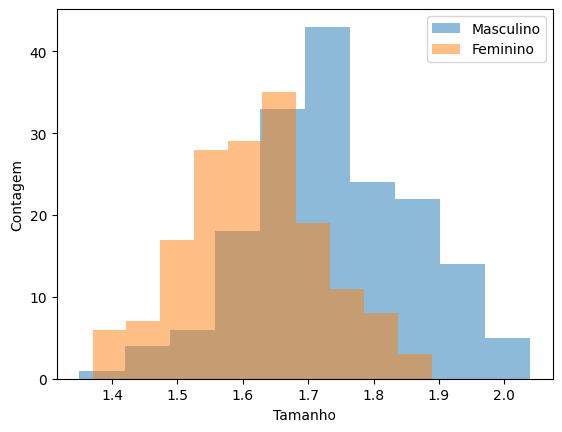

In [43]:
fig, ax = plt.subplots()
ax.hist(dados[dados['Sexo'] == 'M']['Tamanho'], alpha=0.5, label='Masculino')
ax.hist(dados[dados['Sexo'] == 'F']['Tamanho'], alpha=0.5, label='Feminino')
ax.set_xlabel('Tamanho')
ax.set_ylabel('Contagem')
ax.legend()

plt.show()

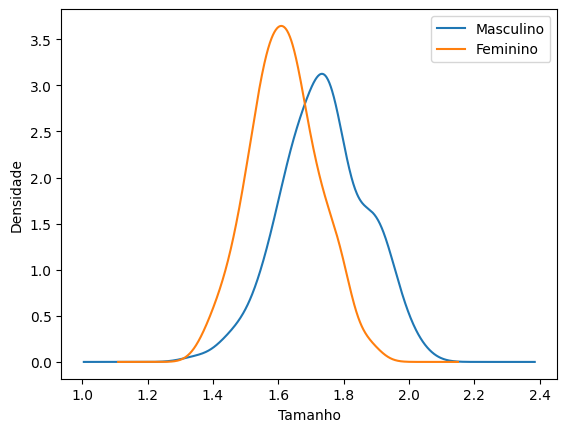

In [47]:
# Crie uma figura e um eixo
fig, ax = plt.subplots()

# Plote a densidade para cada sexo
dados[dados['Sexo'] == 'M']['Tamanho'].plot.density(ax=ax, label='Masculino')
dados[dados['Sexo'] == 'F']['Tamanho'].plot.density(ax=ax, label='Feminino')

# Adicione as legendas e rótulos dos eixos
ax.legend()
ax.set_xlabel('Tamanho')
ax.set_ylabel('Densidade')

plt.show()

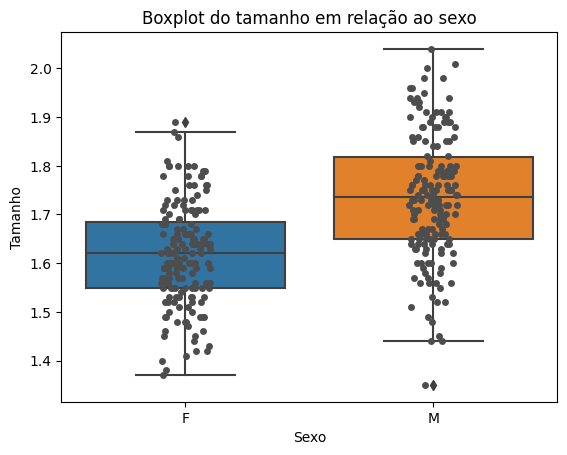

In [53]:
# plotando o gráfico de caixa com tremulação
sns.boxplot(x="Sexo", y="Tamanho", data=dados, dodge=True)
sns.stripplot(x="Sexo", y="Tamanho", data=dados, jitter=True, color=".3")

# adicionando um título e rótulos para os eixos
plt.title("Boxplot do tamanho em relação ao sexo")
plt.xlabel("Sexo")
plt.ylabel("Tamanho")

# exibindo o gráfico
plt.show()

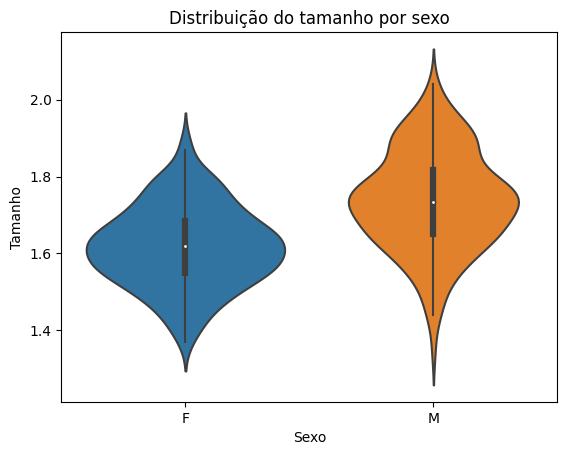

In [54]:
# criação do gráfico
sns.violinplot(x="Sexo", y="Tamanho", data=dados)

# personalização do gráfico
plt.title('Distribuição do tamanho por sexo')
plt.xlabel('Sexo')
plt.ylabel('Tamanho')
plt.show()